In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
Weight = 2.722*9.81 #6lbs in Kg
rho = 1.223
Velocity = 15.6464 # m/s or 35mi/hr
C_len = .2032 #meters
Span = 1 #meter
# S = C_len*Span # 300 square inches to meters squared
S = 0.44608787170063485
qinf = 1/2 * rho * Velocity**2
Re = (rho* Velocity* C_len)/(1.795*10**-5)
CL = Weight / (qinf * S)
# CD = 0.05
Lift = Weight
Thrust = Weight/(CL/CD)
Power = Thrust * Velocity
LiftForce = 1/2 * rho * Velocity**2 * S * CL
print(f'Reynolds number is: {Re}')
cd_0 = 0.01 #lowercase, 2D
AR = Span/C_len
e0=1.78*(1-.045*(AR**.68))-.64
K=1/(np.pi*AR*e0)
CD= cd_0+K*CL**2
print(CL)
print(K)
print(CD)

Reynolds number is: 216620.79058718664
0.399863159812634
0.07160674158462685
0.021449241050445406


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

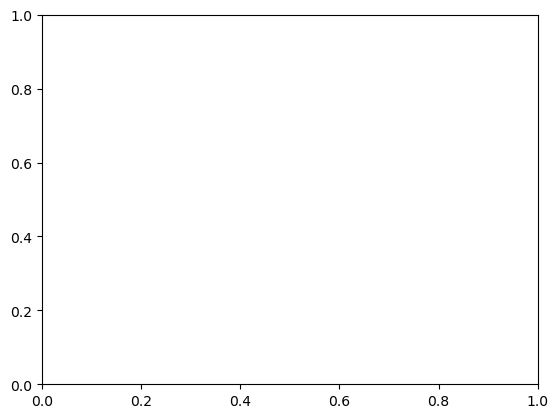

In [89]:
DragF = .5 * rho *Velocity**2*S*CD+.5*rho*Velocity**2*S*(CL**2)
plt.plot(Thrust,DragF)
plt.xlabel("Thrust N")
plt.ylabel("Drag Force N")

In [ ]:
print(f'Thrust is: {Thrust} Newtons\nPower is: {Power} Watts\nCl is: {CL}\nLift Force is: {LiftForce} Newtons')

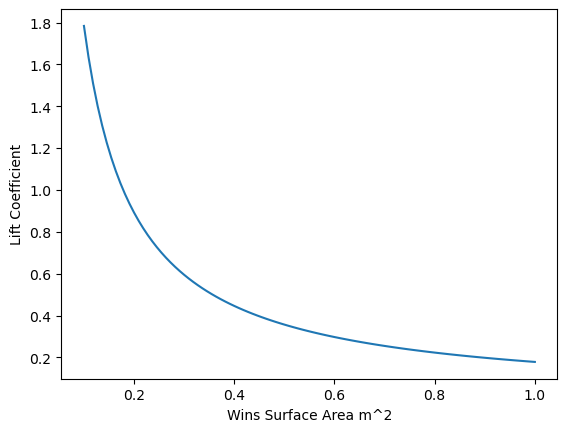

In [90]:
NewS = np.linspace(0.1, 1.0, 100)
NewCL = Weight / (qinf * NewS)
K=1/(np.pi*AR*e0)

CD= cd_0+K*(NewCL**2)
plt.xlabel("Wins Surface Area m^2")
plt.ylabel("Lift Coefficient")
plt.plot(NewS, NewCL)


Text(0, 0.5, 'Thrust N')

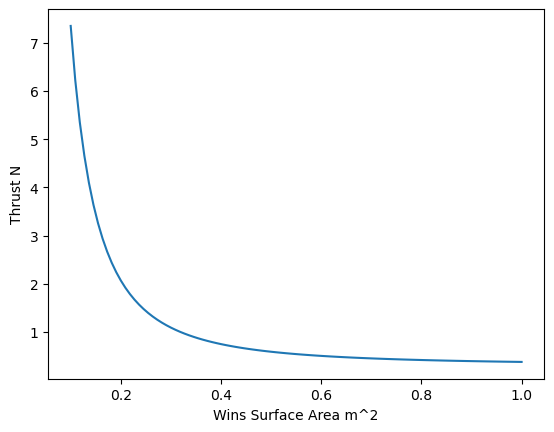

In [91]:
NewLift = 1/2 * rho * Velocity**2 * NewS * CL
Ratio = CL/CD

Thrust = Weight/Ratio
plt.plot(NewS, Thrust)
plt.xlabel("Wins Surface Area m^2")
plt.ylabel("")

Text(0, 0.5, 'Drag Coefficient')

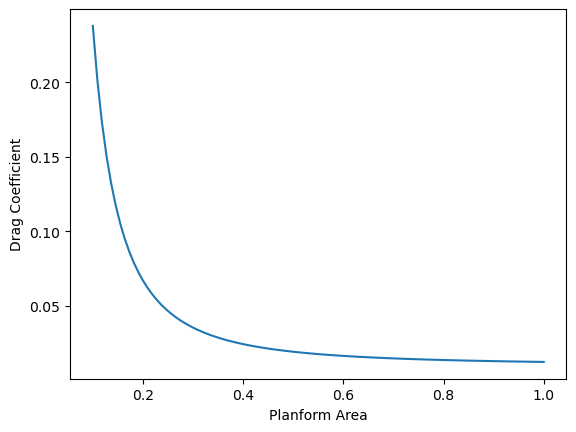

In [97]:
NewCL = Weight / (qinf * NewS)
# print(NewCL)
K=1/(np.pi*AR*e0)
e0=1.78*(1-.045*(AR**.68))-.64
CD= cd_0+K*(NewCL**2)
DragF = .5 * rho *Velocity**2*S*CD+.5*rho*Velocity**2*S*(NewCL**2)
plt.plot(NewS, CD)
plt.xlabel('Planform Area')
plt.ylabel('Drag Coefficient')

In [3]:
Weight = 2.722*9.81 #6lbs in Kg
WingLoading = 20 * 2.993 # oz/ft^2 to pa desired from Sport
Planform = Weight/WingLoading
print(f'Planform area is: {Planform}m^2\n')
CanardS = Planform/5
MainWingS = Planform*(4/5)
print(f'Planform area for canards is: {CanardS}m^2\n')
print(f'Planform area for wings is: {MainWingS}m^2\n')
print(f'Planform area per wing is: {MainWingS/2}m^2\n')
Box_Constraint_Length = 0.4572 # 18inch box constraint
OnePieceWingCord = (MainWingS/2)/Box_Constraint_Length
OnePieceCanardCord = (CanardS/2)/Box_Constraint_Length
print('Assuming only 2 pieces of wing in box at 18 inches what is the cord?\n')
print(f'Wing cord length is: {OnePieceWingCord*39.3701}inches')
print(f'Canard cord length is: {OnePieceCanardCord*39.3701}inches')
TwoPieceWingCord = (MainWingS/2)/(Box_Constraint_Length * 2)
TwoPieceCanardCord = (CanardS/2)/(Box_Constraint_Length * 2)
print('What about 4?\n')
print(f'Wing cord length is: {TwoPieceWingCord*39.3701}inches')
print(f'Canard cord length is: {TwoPieceCanardCord*39.3701}inches')

Planform area is: 0.44608787170063485m^2

Planform area for canards is: 0.08921757434012698m^2

Planform area for wings is: 0.3568702973605079m^2

Planform area per wing is: 0.17843514868025395m^2

Assuming only 2 pieces of wing in box at 18 inches what is the cord?

Wing cord length is: 15.365287941943278inches
Canard cord length is: 3.8413219854858194inches
What about 4?

Wing cord length is: 7.682643970971639inches
Canard cord length is: 1.9206609927429097inches


In [106]:
a = 5 #Pyramid and edge lengths
b = 20 #Fuselage length
TotalVolume = (2*a**3/3) + b * a**2
print(f'Total Volume is: {TotalVolume}in^3')

Total Volume is: 583.3333333333334in^3


Surface area of the Horizontal Tail is = 174.43084439237063 inch ** 2
Ideal distance between center of gravity and 1/4 chord of the canard with its current 1:3 ratio = 13.87731169261789 inch
Surface area of the Vertical Tail is = 77.94387280956381 inch ** 2


C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


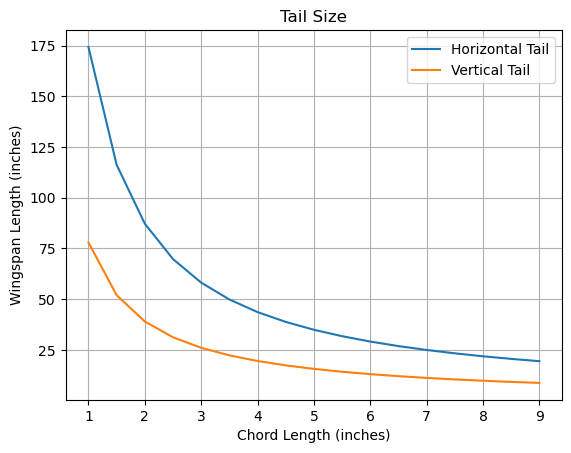

In [2]:
## This document is going to calculation the size of the vertical and horizontal tail sizes relative to the wing size. The code is specifically for the design 1 aircraft (without the canards).

# importining pint ($ pip install pint)
import pint
import numpy as np
import matplotlib.pyplot as plt

# using function ureg to convert between metric and imperial
ureg = pint.UnitRegistry()


# Our Calculated/Given variables
S_ref_meter=0.44608787 * ureg.meter**2
S_ref_inch=S_ref_meter.to(ureg.inch**2)

chord_inch=9.25 * ureg.inch
chord_meter=chord_inch.to(ureg.meter)

wingspan_inch=62 * ureg.inch 
wingspan_meter=wingspan_inch.to(ureg.meter)


# Horizontal Tail Sizing Calculations
# C_HT = S_HT * L_HT / ( chord * S_ref)

# C_HT value shoudl be between 0.3-0.6
C_HT=0.3  # unitless

# Educated guess on what L_HT would be
L_HT=11 * ureg.inch

S_HT=C_HT*chord_inch*S_ref_inch/L_HT
print('Surface area of the Horizontal Tail is =', S_HT)

# Estimated Horizontal Tail chord and length
HT_chord=np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]) * ureg.inch
#print('Chord of Horizontal Tail =', HT_chord)

HT_length=S_HT/HT_chord
#print('Length of Horizontal Tail =', HT_length)



# with the current designed canard, this is what the ideal distance away from the center of gravity should be
S_HT_canard=138.2644802405613 * ureg.inch**2

L_HT_ideal=C_HT*chord_inch*S_ref_inch/S_HT_canard
print('Ideal distance between center of gravity and 1/4 chord of the canard with its current 1:3 ratio =', L_HT_ideal)



# Vertical Tail Sizing Calculations
# C_VT = S_VT * L_VT / ( wingspan * S_ref)

# C_VT value shoudl be between 0.02-0.05
C_VT=0.02  # unitless

# Educated guess on what L_VT would be
L_VT=11 * ureg.inch

S_VT=C_VT*wingspan_inch*S_ref_inch/L_VT
print('Surface area of the Vertical Tail is =', S_VT)

# Estimated Vertical Tail chord and length
VT_chord=np.array([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9]) * ureg.inch
#print('Chord of Vertical Tail =', HT_chord)

VT_length=S_VT/VT_chord
#print('Length of Vertical Tail =', HT_length)



plt.plot(HT_chord,HT_length)
plt.plot(VT_chord,VT_length)

plt.title("Tail Size")
plt.xlabel("Chord Length (inches)")
plt.ylabel("Wingspan Length (inches)")
plt.legend(["Horizontal Tail", "Vertical Tail"])
plt.grid()

plt.savefig('Tail_Sizing.png')
